In [1]:
%matplotlib inline


================================================
Creating multiple subplots using ``plt.subplot``
================================================

`.pyplot.subplots` creates a figure and a grid of subplots with a single call,
while providing reasonable control over how the individual plots are created.
For more advanced use cases you can use `.GridSpec` for a more general subplot
layout or `.Figure.add_subplot` for adding subplots at arbitrary locations
within the figure.


In [2]:
# sphinx_gallery_thumbnail_number = 11

import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

A figure with just one subplot
""""""""""""""""""""""""""""""

``subplots()`` without arguments returns a `.Figure` and a single
`~.axes.Axes`.

This is actually the simplest and recommended way of creating a single
Figure and Axes.



Text(0.5, 1.0, 'A single plot')

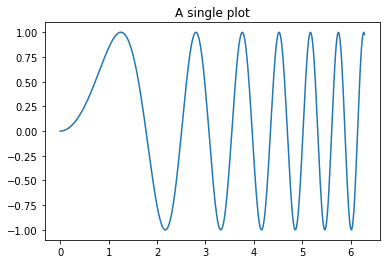

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

Stacking subplots in one direction
""""""""""""""""""""""""""""""""""

The first two optional arguments of `.pyplot.subplots` define the number of
rows and columns of the subplot grid.

When stacking in one direction only, the returned `axs` is a 1D numpy array
containing the list of created Axes.



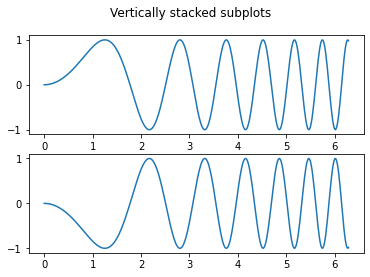

In [4]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

If you are creating just a few Axes, it's handy to unpack them immediately to
dedicated variables for each Axes. That way, we can use ``ax1`` instead of
the more verbose ``axs[0]``.



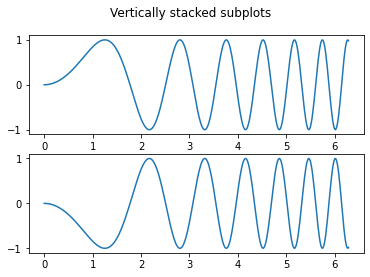

In [5]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

To obtain side-by-side subplots, pass parameters ``1, 2`` for one row and two
columns.



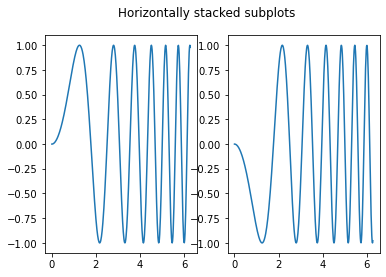

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

Stacking subplots in two directions
"""""""""""""""""""""""""""""""""""

When stacking in two directions, the returned `axs` is a 2D numpy array.

If you have to set parameters for each subplot it's handy to iterate over
all subplots in a 2D grid using ``for ax in axs.flat:``.



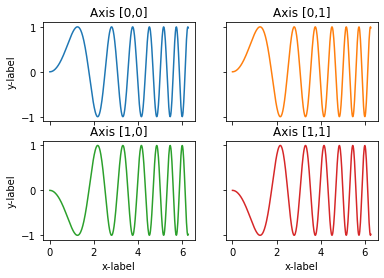

In [7]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

You can  use tuple-unpacking also in 2D to assign all subplots to dedicated
variables:



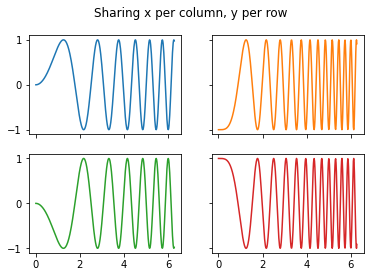

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
fig.text()
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

Sharing axes
""""""""""""

By default, each Axes is scaled individually. Thus, if the ranges are
different the tick values of the subplots do not align.



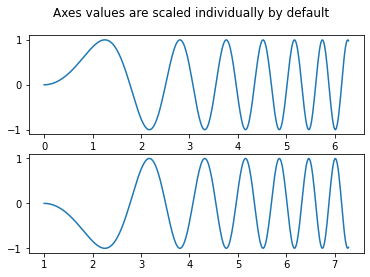

In [9]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

You can use *sharex* or *sharey* to align the horizontal or vertical axis.



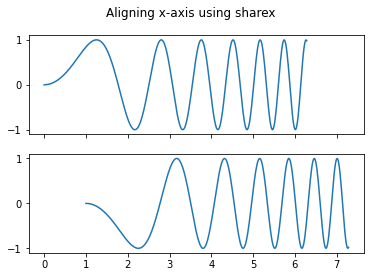

In [10]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

Setting *sharex* or *sharey* to ``True`` enables global sharing across the
whole grid, i.e. also the y-axes of vertically stacked subplots have the
same scale when using ``sharey=True``.



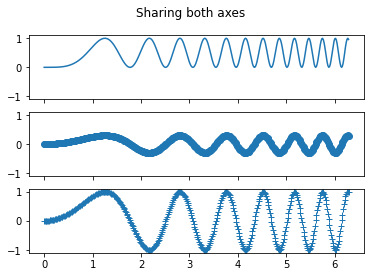

In [11]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

For subplots that are sharing axes one set of tick labels is enough. Tick
labels of inner Axes are automatically removed by *sharex* and *sharey*.
Still there remains an unused empty space between the subplots.

The parameter *gridspec_kw* of `.pyplot.subplots` controls the grid
properties (see also `.GridSpec`). For example, we can reduce the height
between vertical subplots using ``gridspec_kw={'hspace': 0}``.

`.label_outer` is a handy method to remove labels and ticks from subplots
that are not at the edge of the grid.



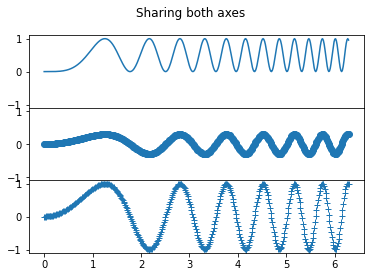

In [12]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

In [13]:
for ax in axs:
    print(ax)

AxesSubplot(0.125,0.628333;0.775x0.251667)
AxesSubplot(0.125,0.376667;0.775x0.251667)
AxesSubplot(0.125,0.125;0.775x0.251667)


Apart from ``True`` and ``False``, both *sharex* and *sharey* accept the
values 'row' and 'col' to share the values only per row or column.



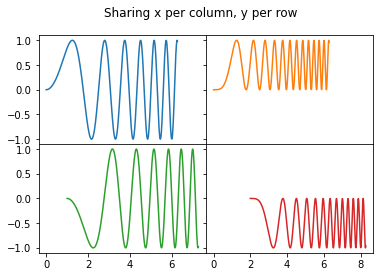

In [14]:
fig, axs = plt.subplots(2, 2, sharex="col", sharey="row",
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x + 1, -y, 'tab:green')
ax4.plot(x + 2, -y**2, 'tab:red')

for ax in axs.flat:
    ax.label_outer()

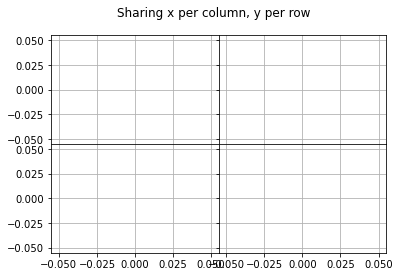

In [15]:
fig, axs = plt.subplots(2, 2, sharex="col", sharey="row",
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('Sharing x per column, y per row')
#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x + 1, -y, 'tab:green')
#ax4.plot(x + 2, -y**2, 'tab:red')
i = 0
for ax in axs.T.reshape(-1):#axs.flat:
    ax.plot(0,0)
    ax.grid()
    ax.label_outer()
    i += 1

In [16]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4723404d00>,
      dtype=object)

In [17]:
axs.T

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4723404d00>,
      dtype=object)

In [18]:
axs.reshape(-1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4723404d00>,
      dtype=object)

In [19]:
for ax in axs.flat:
    print(ax)

AxesSubplot(0.125,0.5025;0.3875x0.3775)
AxesSubplot(0.5125,0.5025;0.3875x0.3775)
AxesSubplot(0.125,0.125;0.3875x0.3775)
AxesSubplot(0.5125,0.125;0.3875x0.3775)


In [20]:
for ax in axs:
    print(ax)

In [21]:
ax2

Polar axes
""""""""""

The parameter *subplot_kw* of `.pyplot.subplots` controls the subplot
properties (see also `.Figure.add_subplot`). In particular, this can be used
to create a grid of polar Axes.



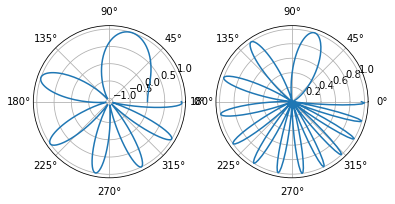

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax1.plot(x, y)
ax2.plot(x, y ** 2)

plt.show()

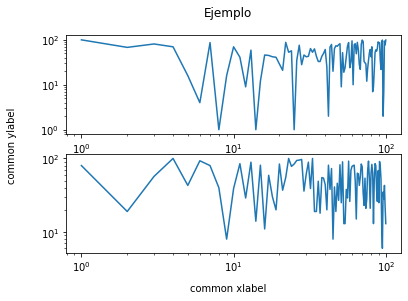

In [30]:
import random
import matplotlib.pyplot as plt

x = range(1, 101)
y1 = [random.randint(1, 100) for _ in range(len(x))]
y2 = [random.randint(1, 100) for _ in range(len(x))]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.loglog(x, y1)
ax2.loglog(x, y2)

# Set common labels
fig.text(0.5, 0, 'common xlabel', ha='center', va='center')
fig.text(0, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

#fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center')
#fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

# Set common title
fig.suptitle("Ejemplo")

#ax1.set_title('ax1 title')
#ax2.set_title('ax2 title')

plt.savefig('common_labels_text.png', dpi=300)